# Decision Tree Classifier:

![Kyphosis](https://www.mdpi.com/applsci/applsci-09-03322/article_deploy/html/images/applsci-09-03322-g002-550.jpg)
**(a)** A normal spine (without kyphosis); **(b)** Patient with abnormal spine (kyphosis).


**Problem Statement**:

Detecting kyphosis disease at the early stage in children will prevent abnormal spinal vertebrae problems.
The problem that we are going to solve here is that given a set of features that describe the absence or presence of kyphosis, our machine learning model must predict whether the kyphosis is present or absent. To train our machine learning model with kyphosis data, we will be using  childen dataset [Kyphosis](https://raw.githubusercontent.com/Mounika-Kajjam/Datasets/master/kyphosis.csv)

INPUTS:
- Age: in months
- Number: the number of vertebrae involved
- Start: the number of the first (topmost) vertebra operated on.

OUTPUT:
- Kyphosis: a factor with levels absent present indicating if a kyphosis (a type of deformation) was present after the operation




In [1]:
import pandas as pd
import numpy as np
import seaborn as sns

In [2]:
df=pd.read_csv("https://raw.githubusercontent.com/Mounika-Kajjam/Datasets/master/kyphosis.csv")
df.head()

,Kyphosis,Age,Number,Start
0,absent,71,3,5
1,absent,158,3,14
2,present,128,4,5
3,absent,2,5,1
4,absent,1,4,15


In [7]:
df.Kyphosis.value_counts()

absent     64
present    17
Name: Kyphosis, dtype: int64

In [3]:
df.shape

(81, 4)

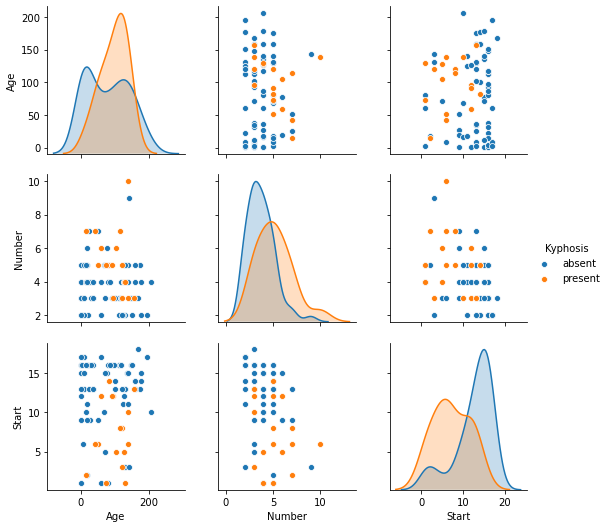

In [6]:
sns.pairplot(df,hue='Kyphosis')

In [8]:
X=df.drop('Kyphosis',axis=1)
y = df.Kyphosis


In [9]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y, test_size=0.2, random_state=42)

In [10]:
print(X_train.shape)

(64, 3)


# Decision Tree Algorithm:

In [11]:
from sklearn.tree import DecisionTreeClassifier
dtc= DecisionTreeClassifier(criterion = 'entropy')
dtc.fit(X_train,y_train)

DecisionTreeClassifier(class_weight=None, criterion='entropy', max_depth=None,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=None, splitter='best')

In [12]:
#Predicting on training data itself
y_train_pred = dtc.predict(X_train)
y_train_pred

array(['present', 'absent', 'present', 'present', 'absent', 'absent',
       'absent', 'absent', 'absent', 'absent', 'absent', 'absent',
       'present', 'absent', 'absent', 'absent', 'absent', 'absent',
       'absent', 'absent', 'absent', 'absent', 'absent', 'absent',
       'absent', 'absent', 'absent', 'absent', 'absent', 'absent',
       'absent', 'absent', 'absent', 'absent', 'present', 'absent',
       'absent', 'absent', 'absent', 'present', 'present', 'absent',
       'absent', 'present', 'absent', 'absent', 'present', 'absent',
       'absent', 'absent', 'present', 'absent', 'absent', 'present',
       'present', 'present', 'absent', 'absent', 'absent', 'absent',
       'present', 'absent', 'absent', 'absent'], dtype=object)

In [15]:
#Classification report for prediction on training data:
from sklearn.metrics import classification_report, confusion_matrix
print(classification_report(y_train,y_train_pred))

              precision    recall  f1-score   support

      absent       1.00      1.00      1.00        50
     present       1.00      1.00      1.00        14

    accuracy                           1.00        64
   macro avg       1.00      1.00      1.00        64
weighted avg       1.00      1.00      1.00        64



In [16]:
confusion_matrix(y_train,y_train_pred)

array([[50,  0],
       [ 0, 14]], dtype=int64)

In [17]:
#Predicting on testing data:
y_test_pred=dtc.predict(X_test)
y_test_pred

array(['absent', 'present', 'present', 'absent', 'absent', 'absent',
       'absent', 'absent', 'absent', 'present', 'absent', 'absent',
       'present', 'absent', 'absent', 'absent', 'present'], dtype=object)

In [18]:
print(classification_report(y_test,y_test_pred))

              precision    recall  f1-score   support

      absent       0.83      0.71      0.77        14
     present       0.20      0.33      0.25         3

    accuracy                           0.65        17
   macro avg       0.52      0.52      0.51        17
weighted avg       0.72      0.65      0.68        17



### Overfitting:
 - Happens when the training data predicting shows 100-95% accuracy
  - whereas when predicted using test data it shows very less accuracy (80-..)

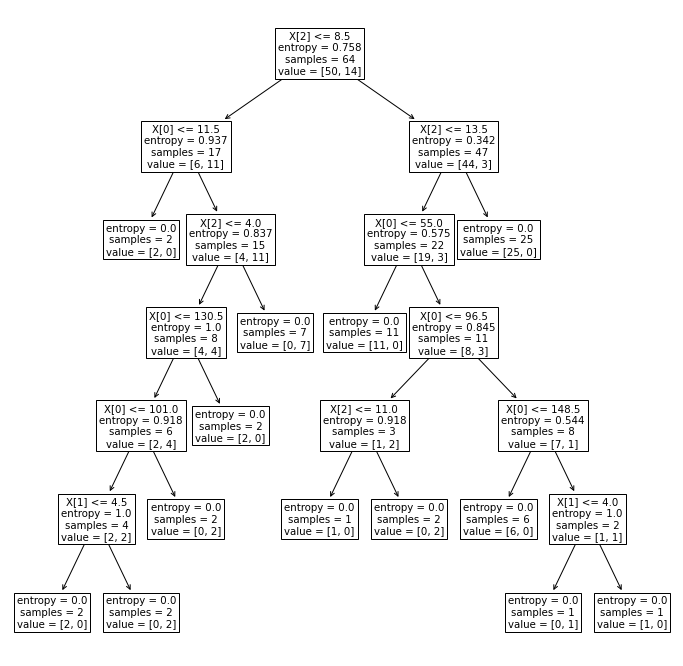

In [22]:
#Visualization of DTC
import matplotlib.pyplot as plt
from sklearn import tree
clf = tree.DecisionTreeClassifier(criterion = 'entropy')
plt.figure(figsize=(12,12))
tree.plot_tree(dtc)
plt.show()

In [24]:
# kfold cv:
from sklearn.model_selection import cross_val_score
cross_val_score(dtc,X_train,y_train,cv=5)

array([0.76923077, 0.84615385, 0.76923077, 0.69230769, 0.83333333])

## Hyper Parameters:
 - GridSearchCV->find optimum parameters

In [32]:
grid_param = {'criterion': ['gini','entropy'],
             'max_depth': range(2, 10, 1),
             'min_samples_leaf' : range(1,10,1)}

In [35]:
from sklearn.model_selection import GridSearchCV
grid_search=GridSearchCV(estimator=dtc,param_grid=grid_param)
# applting to the data set 
grid_search.fit(X_train,y_train)

c:\users\srinaja\miniconda3\lib\site-packages\sklearn\model_selection\_split.py:1978: FutureWarning: The default value of cv will change from 3 to 5 in version 0.22. Specify it explicitly to silence this warning.
  warnings.warn(CV_WARNING, FutureWarning)


GridSearchCV(cv='warn', error_score='raise-deprecating',
             estimator=DecisionTreeClassifier(class_weight=None,
                                              criterion='entropy',
                                              max_depth=None, max_features=None,
                                              max_leaf_nodes=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              presort=False, random_state=None,
                                              splitter='best'),
             iid='warn', n_jobs=None,
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': range(2, 10),
                 

In [36]:
# which parameters that worked well 
grid_search.best_params_

{'criterion': 'gini', 'max_depth': 2, 'min_samples_leaf': 8}

In [39]:
#We have to build the model with the best parameters
#initialize  the DT classifier
clf = DecisionTreeClassifier(criterion='gini',max_depth=2,min_samples_leaf = 8)

#We need to fit the model to the data
clf.fit(X_train,y_train)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=2,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=8, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=None, splitter='best')

In [41]:
#Prediction on test data
pred_test = clf.predict(X_test)
print(classification_report(y_test,pred_test))

              precision    recall  f1-score   support

      absent       0.81      0.93      0.87        14
     present       0.00      0.00      0.00         3

    accuracy                           0.76        17
   macro avg       0.41      0.46      0.43        17
weighted avg       0.67      0.76      0.71        17

